### 15.6

In [ ]:
from tensorflow.keras.datasets import mnist
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

sns.set(font_scale=2)

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

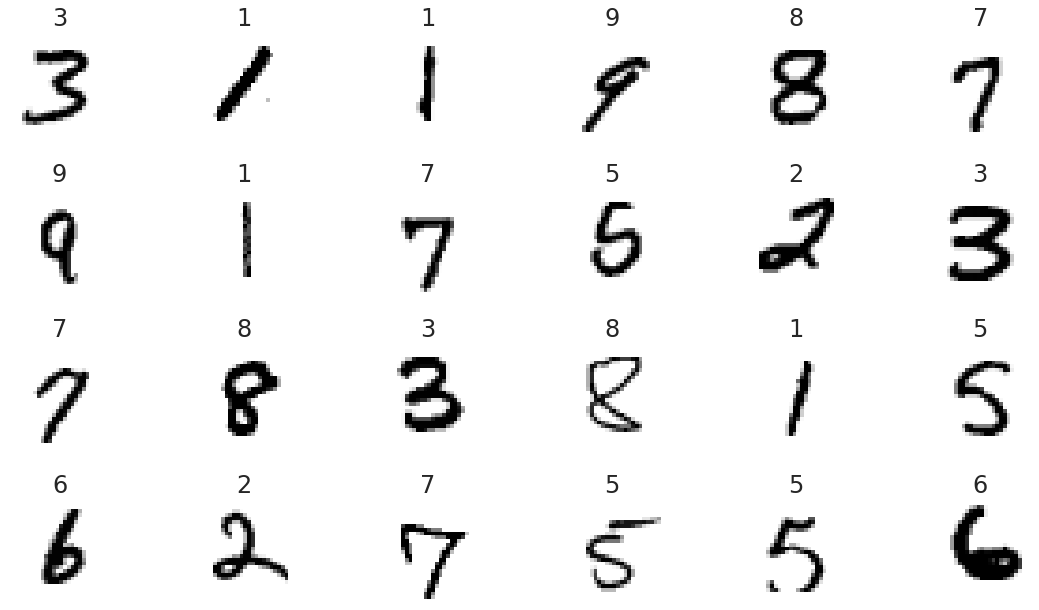

In [ ]:
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

In [ ]:
X_train = X_train.reshape((60000, 28, 28, 1)) 
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test = X_test.reshape((10000, 28, 28, 1))
X_test.shape

(10000, 28, 28, 1)

In [ ]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
y_train = to_categorical(y_train)
y_train.shape

(60000, 10)

In [ ]:
y_test = to_categorical(y_test)
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
cnn = Sequential()

In [ ]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

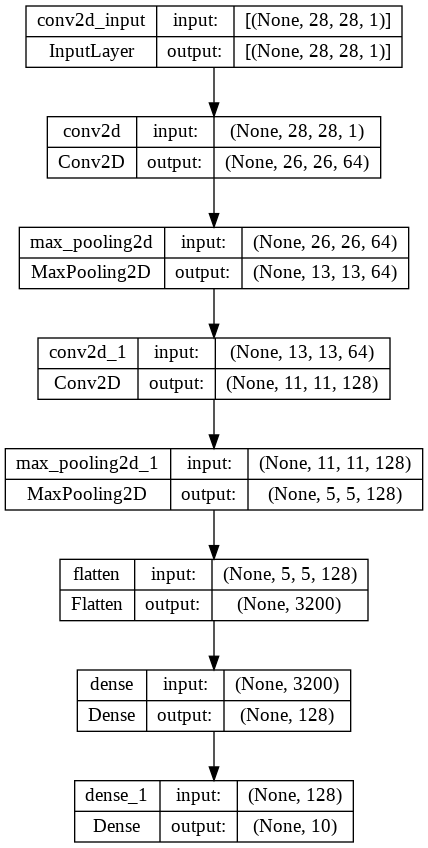

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='convnet.png')

In [ ]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 73s 85ms/step - loss: 0.1441 - accuracy: 0.9554 - val_loss: 0.0526 - val_accuracy: 0.9863
Epoch 2/5
844/844 [==============================] - 71s 84ms/step - loss: 0.0449 - accuracy: 0.9864 - val_loss: 0.0347 - val_accuracy: 0.9888
Epoch 3/5
844/844 [==============================] - 72s 85ms/step - loss: 0.0303 - accuracy: 0.9900 - val_loss: 0.0495 - val_accuracy: 0.9862
Epoch 4/5
844/844 [==============================] - 71s 84ms/step - loss: 0.0196 - accuracy: 0.9935 - val_loss: 0.0372 - val_accuracy: 0.9895
Epoch 5/5
844/844 [==============================] - 71s 84ms/step - loss: 0.0154 - accuracy: 0.9951 - val_loss: 0.0386 - val_accuracy: 0.9907


In [ ]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0303 - accuracy: 0.9899


In [ ]:
loss

0.03034275770187378

In [ ]:
accuracy

0.9898999929428101

In [ ]:
predictions = cnn.predict(X_test)

313/313 [==============================] - 4s 12ms/step


In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}') 

0: 0.0000000031%
1: 0.0000001508%
2: 0.0000006695%
3: 0.0000189254%
4: 0.0000000000%
5: 0.0000001413%
6: 0.0000000000%
7: 99.9999463558%
8: 0.0000001181%
9: 0.0000220037%


In [ ]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

In [ ]:
len(incorrect_predictions)

101

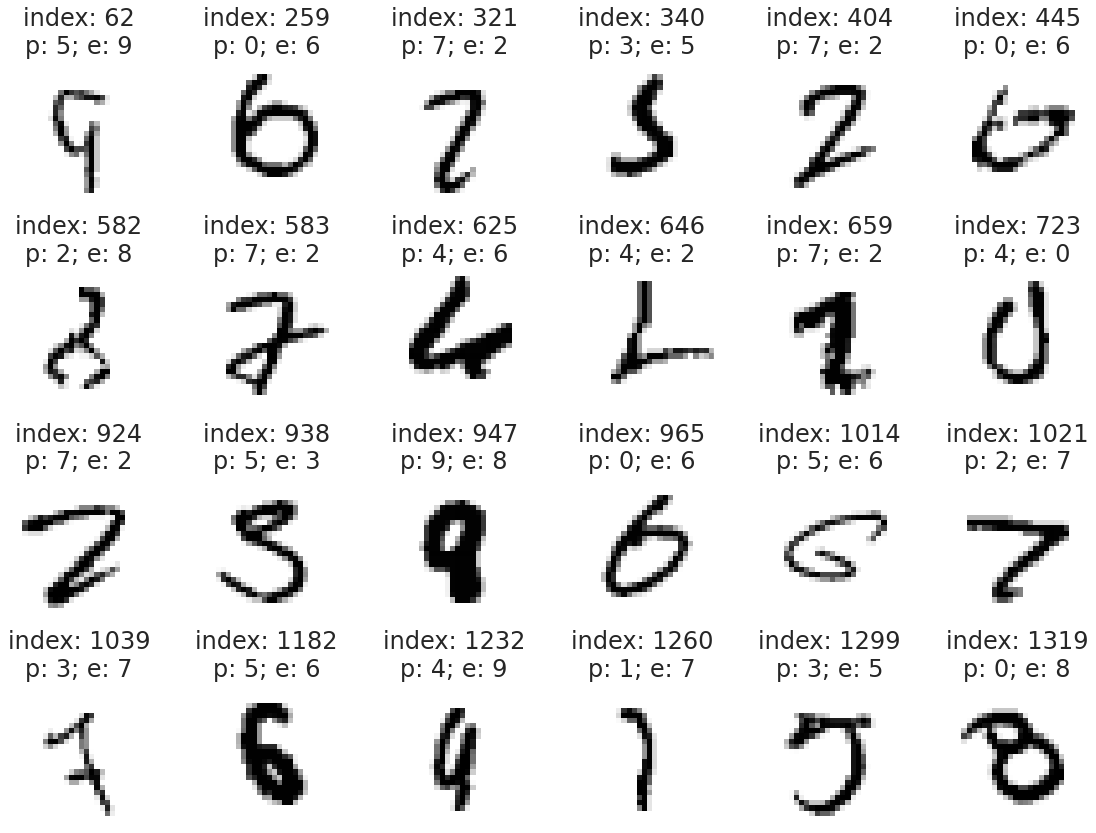

In [ ]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))
for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [ ]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [ ]:
display_probabilities(predictions[259])

0: 76.7395794392%
1: 0.0000011876%
2: 0.0000000902%
3: 0.0000000002%
4: 0.0001045461%
5: 0.1505576074%
6: 23.1092229486%
7: 0.0000000011%
8: 0.0005168121%
9: 0.0000115528%


In [ ]:
display_probabilities(predictions[938])

0: 0.0000000000%
1: 0.0000000002%
2: 0.0000000003%
3: 26.2386739254%
4: 0.0000000003%
5: 73.7511754036%
6: 0.0000000001%
7: 0.0000000000%
8: 0.0100419587%
9: 0.0001000522%


In [ ]:
cnn.save('mnist_cnn.h5')

In [ ]:
from tensorflow.keras.models import load_model
cnn = load_model('mnist_cnn.h5')